In [1]:
import sys
import os
import numpy as np
sys.path.insert(0, r'D:\uni\Masterarbeit\Code\auswertung')
import auswertung_ma
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
from auswertung_ma import f_exp, f_poly, f_poly_long

In [2]:
data1 = {}
p1 = r"D:\Uni\Masterarbeit\Daten\KFC2\1_scenario"

for ho in os.listdir(p1):
#     print(ho)
    n = int(ho.split("_")[1])
    data1[n] = auswertung_ma.Read_HO(os.path.join(p1, ho), 'p', -2, read_tracking=False, read_lp=False)

Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!
ROBERTWARNUNG: Im Ordner TreePlusC_4.000000_c_320_nodes_1_RandomScenarioCreator_KantenFaktorCreator2_0.00_2.00\simulation_0 gibt es keine results.txt Datei!
ROBERTWARNUNG: Im Ordner TreePlusC_4.000000_c_320_nodes_1_RandomScenarioCreator_KantenFaktorCreator2_0.00_2.00 gibt es keine results.txt Dateien!
ROBERTWARNUNG: Im Ordner TreePlusC_4.000000_c_320_nodes_1_RandomScenarioCreator_KantenFaktorCreator2_0.50_2.00\simulation_1 gibt es keine results.txt Datei!
ROBERTWARNUNG: Im Ordner TreePlusC_4.000000_c_320_nodes_1_RandomScenarioCreator_KantenFaktorCreator2_0.00_2.00\simulation_0 gibt es keine results.txt Datei!
ROBERTWARNUNG: Im Ordner TreePlusC_4.000000_c_320_nodes_1_RandomScenarioCreator_KantenFaktorCreator2_0.00_2.00 gibt es keine results.txt Dateien!
ROBERTWARNUNG: Im Ordner TreePlusC_4.000000_c_320_nodes_1_RandomScenarioCreator_KantenFaktorCreator2_0.50_2.00\simulation_1

In [3]:
data1[40].id_values

[0.0,
 0.1,
 0.25,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.75,
 1.0]

AttributeError: 'Read_HO' object has no attribute 'anteil_ganz_geloest'

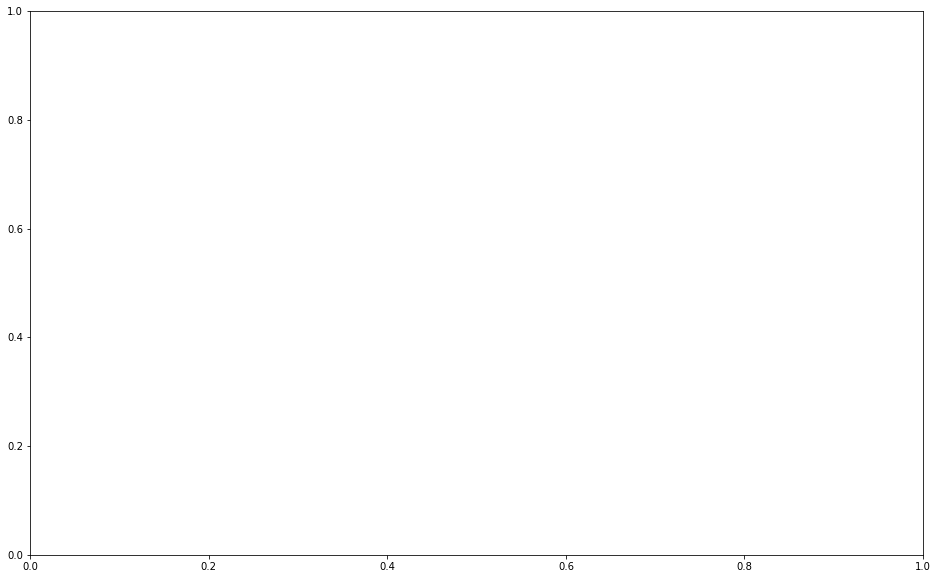

In [4]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(data1.keys()):
    ax.scatter(data1[n].id_values, data1[n].anteil_ganz_geloest, label=f'N={n}')
    
ax.set_xlabel('p_k', fontsize=20)
ax.set_ylabel('$r_{sol}$', fontsize=20)
ax.set_title('1 Szenario, KFC2(p_k)', fontsize=20)
ax.legend(fontsize=20)

In [8]:
print(data1[160].m_res['Schranke4b']['ms'])
print(data1[160].m_res['LP_Approx']['ms'])

[159.0, 150.97307232499992, 139.11097713999996, 119.46901529666674, 118.36793198, 117.7223118250001, 117.12400463499995, 111.1985605, 100.14571463666665, 83.71922904333327]
[159.0, 150.97307232499992, 139.11097713999996, 119.46997116833339, 118.36959811749999, 117.72508416000011, 117.12815211499993, 111.2215226725, 100.45031384166673, 84.63155626333341]


(0.9, 1.02)

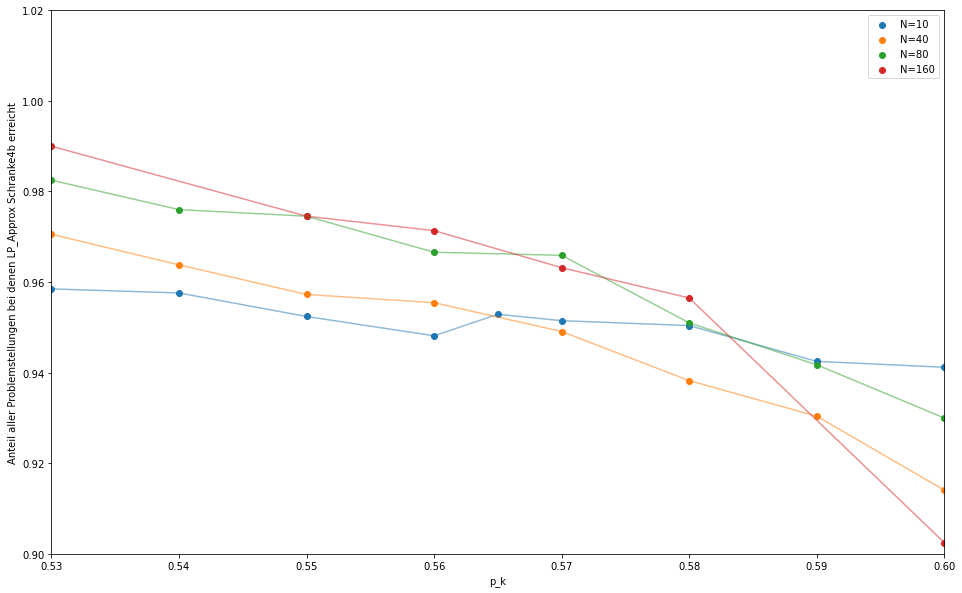

In [5]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.0
alg='LP_Approx'

ns = sorted(data1.keys())
# ns.reverse()
for n in ns[:-1]:
    
#     b_beide, anteile, _ = data5[n].check_alg_vs_schranke4b(alg, alpha)
    
#     sorted_anteile = 
#     b_beide = sorted()
    
    ax.scatter(*(data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1]), label=f'N={n}')
    ax.plot(*data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1], alpha=0.5)

ax.legend()

ax.set_xlabel('p_k')
ax.set_ylabel('Anteil aller Problemstellungen bei denen LP_Approx Schranke4b erreicht')

ax.set_xlim([0.53,0.6])
ax.set_ylim([0.9, 1.02])
# plt.savefig('pk_uebergang_lp.png')

Der LP-Approx erreicht die Schranke bis zu p_krit, obwohl nicht alle Problemstellungen ganz gelöst werden

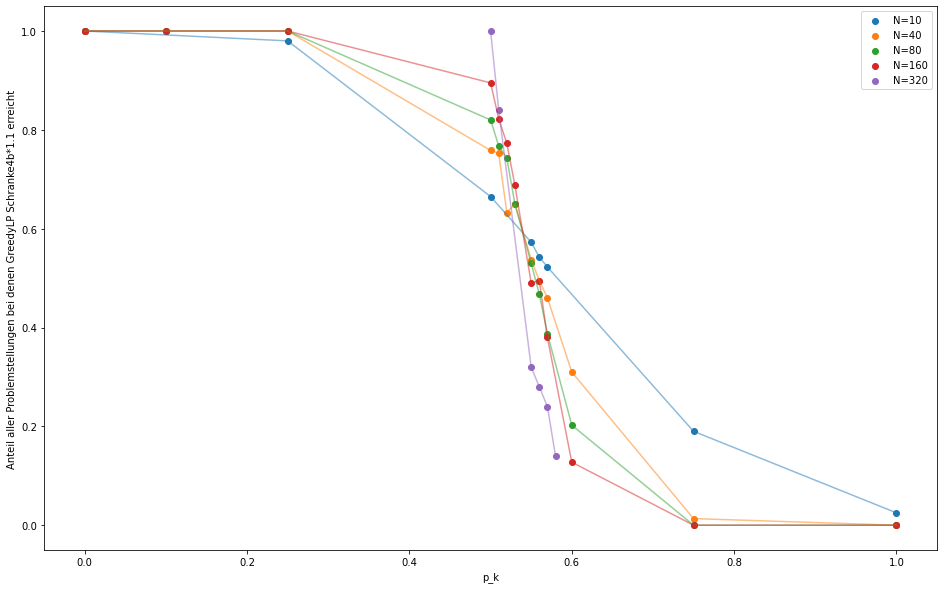

In [22]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.1
alg='Greedy'

ns = sorted(data1.keys())
# ns.reverse()
for n in ns[:]:
    
#     b_beide, anteile, _ = data5[n].check_alg_vs_schranke4b(alg, alpha)
    
#     sorted_anteile = 
#     b_beide = sorted()
    
    ax.scatter(*(data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1]), label=f'N={n}')
    ax.plot(*data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1], alpha=0.5)

ax.legend()
ax.set_xlabel('p_k')
ax.set_ylabel('Anteil aller Problemstellungen bei denen GreedyLP Schranke4b*1.1 erreicht')

# ax.set_xlim([4.9,5.6])
# ax.set_ylim([0.9, 1.02])
plt.savefig('pk_uebergang_greedy.png')

Phasenübergang?

Ab einem bestimmten Prozentsatz an Kanten, die ich verändere, wird das Problem schwerer lösbar. Ist das genau 50%? Ich verändere jedes individuelle Kantengewicht mit dieser Wahrscheinlichkeit, nicht pro Kante. Das ist hier aber äquivalent, weil ich nur 1 Szenario habe!!

Je größer das System wird, desto mehr Kanten hab ich auch. Wenn weniger als 50% aller Kanten verändert werden, dann gilt für die Mehrheit der Kanten noch, dass sie in der ersten Stage 1 und in der 2. 2 Kosten. Es ist die Frage, ob die dann immer genommen werden oder nicht? Es gibt ja auch Kanten, die billiger werden. Reichen diese in Kombination mit den unveränderten immer aus, um einen min Spannbaum komplett in der ersten Phase zu bauen? Vielleicht ist der kritische Punkt aber auch etwas hinter 0.5?

Wie sieht das für 2 oder 5 szenarien aus? Weil dann ist es nicht mehr so eindeutig, da auch nur ein 2.Stage Wert pro Kante verändert werden kann.

Text(0.5, 1.0, 'Loop-Iteration-Skalierung')

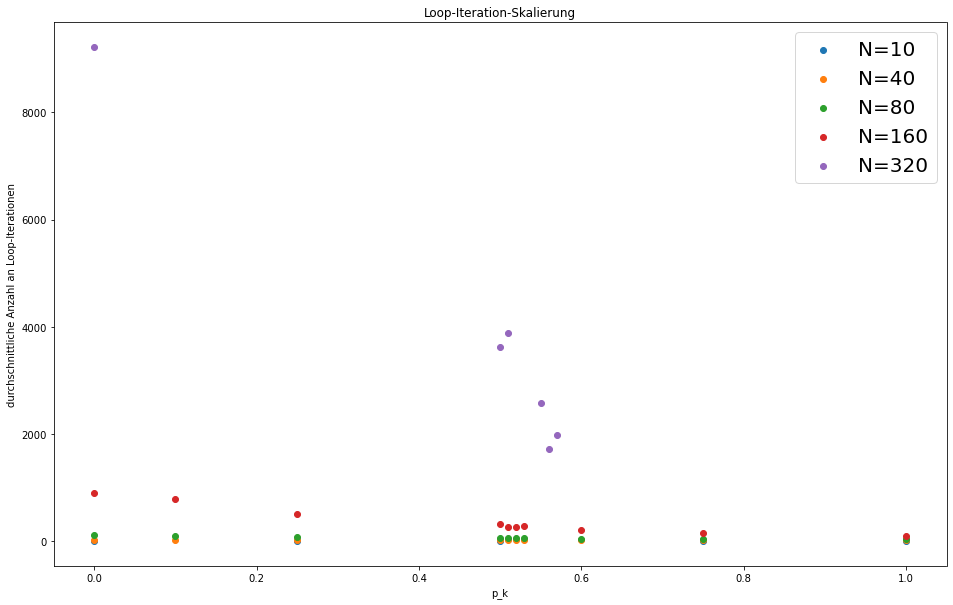

In [32]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(data1.keys()):
    ax.scatter(data1[n].id_values, data1[n].mean_loop_iterations, label=f'N={n}')

ax.legend(fontsize=20)
ax.set_xlabel('p_k')
ax.set_ylabel('durchschnittliche Anzahl an Loop-Iterationen')
ax.set_title('Loop-Iteration-Skalierung')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim([0,200])

# 2 Szenarien

In [11]:
data2 = {}
p2 = r"D:\Uni\Masterarbeit\Daten\KFC2\2_scenarios"

for ho in os.listdir(p2):
#     print(ho)
    n = int(ho.split("_")[1])
    data2[n] = auswertung_ma.Read_HO(os.path.join(p2, ho), 'p', -2, read_tracking=False)

Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!


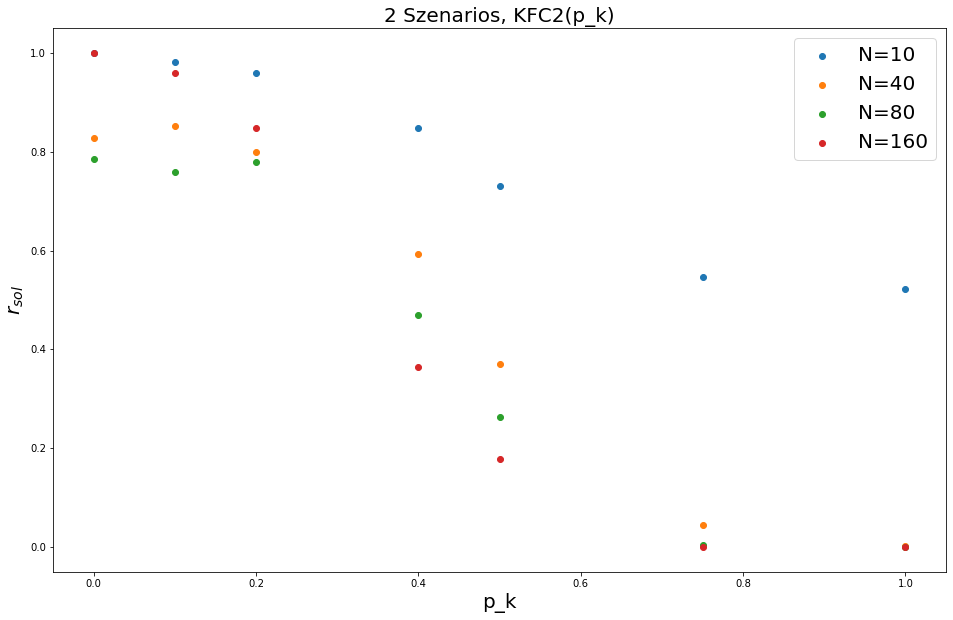

In [12]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(data2.keys()):
    ax.scatter(data2[n].id_values, data2[n].anteil_ganz_geloest, label=f'N={n}')
    
ax.set_xlabel('p_k', fontsize=20)
ax.set_ylabel('$r_{sol}$', fontsize=20)
ax.set_title('2 Szenarios, KFC2(p_k)', fontsize=20)
ax.legend(fontsize=20)

alpha = 1.01, 1.02, 1.03

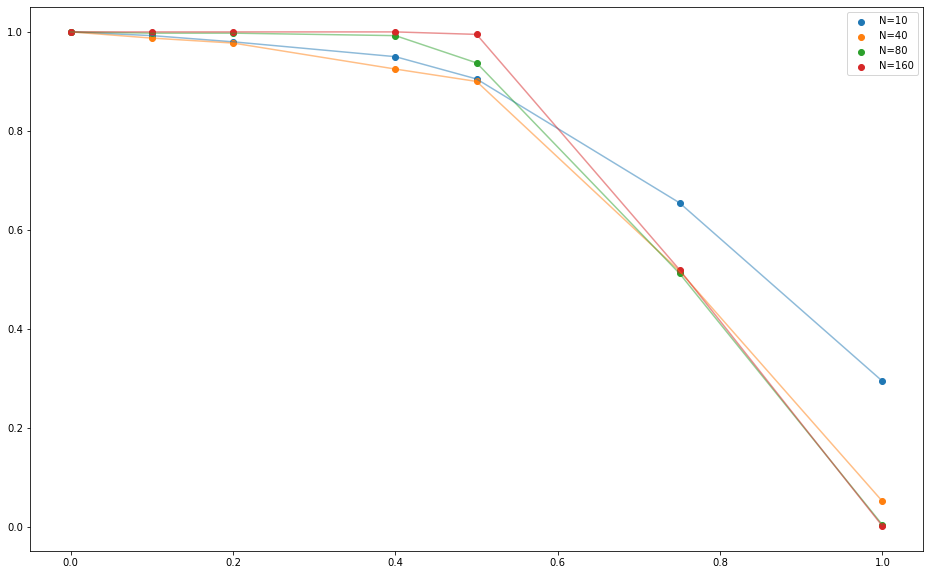

In [25]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.01
alg='LP_Approx'

ns = sorted(data2.keys())
# ns.reverse()
for n in ns[:]:
    
#     b_beide, anteile, _ = data5[n].check_alg_vs_schranke4b(alg, alpha)
    
#     sorted_anteile = 
#     b_beide = sorted()
    
    ax.scatter(*(data2[n].check_alg_vs_schranke4b(alg, alpha)[:-1]), label=f'N={n}')
    ax.plot(*data2[n].check_alg_vs_schranke4b(alg, alpha)[:-1], alpha=0.5)

ax.legend()
# ax.set_xlim([4.9,5.6])
# ax.set_ylim([0.9, 1.02])

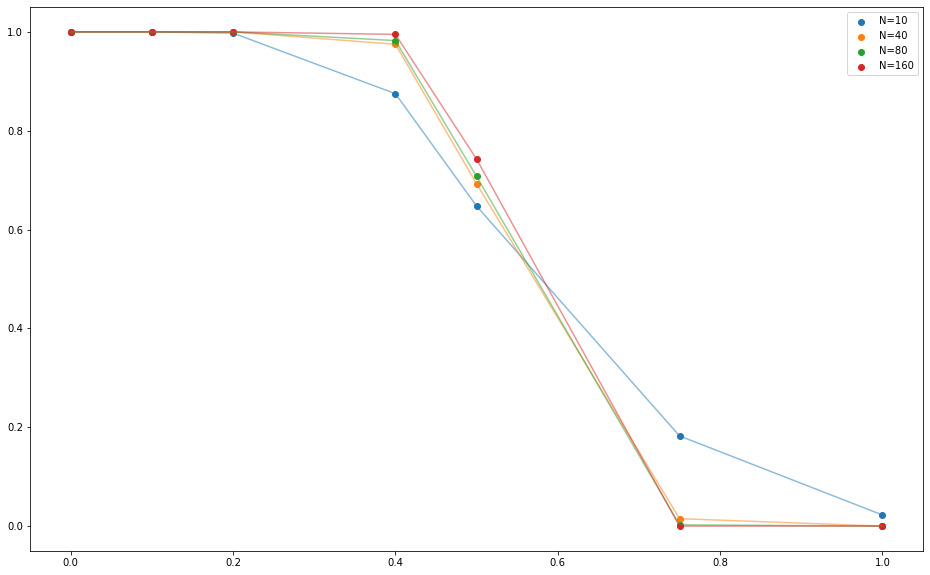

In [22]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.2
alg='Greedy'

ns = sorted(data2.keys())
# ns.reverse()
for n in ns[:]:
    
#     b_beide, anteile, _ = data5[n].check_alg_vs_schranke4b(alg, alpha)
    
#     sorted_anteile = 
#     b_beide = sorted()
    
    ax.scatter(*(data2[n].check_alg_vs_schranke4b(alg, alpha)[:-1]), label=f'N={n}')
    ax.plot(*data2[n].check_alg_vs_schranke4b(alg, alpha)[:-1], alpha=0.5)

ax.legend()
# ax.set_xlim([4.9,5.6])
# ax.set_ylim([0.9, 1.02])

Man kann mit dem Alpha fast beliebig irgendwelche Schnittpunkte erzwingen

# checke, ob wenn k=1 (1 szenario) Schranke und Optimum gleich sind

In [6]:
p_st10 = r"D:\Uni\Masterarbeit\Daten\KFC2\scenario_test_10_nodes_1_scenarios"
p_st20 = r"D:\Uni\Masterarbeit\Daten\KFC2\scenario_test_20_nodes_1_scenarios"

In [16]:
for subfolder in os.listdir(p_st10):
    df = auswertung_ma.read_results(os.path.join(p_st10, subfolder))
    df['diff'] = df['Schranke4b'] - df['Optimum2']
    print(df['diff'].mean())

0.0
0.0
0.0


In [19]:
for subfolder in os.listdir(p_st20):
    df = auswertung_ma.read_results(os.path.join(p_st20, subfolder))
    df['diff'] = df['Schranke4b'] - df['Optimum2']
    print(df['diff'].mean())

0.0
0.0
0.0


Ich schliesse, dass fuer 1 Szenario bestätigt wurde, dass Schranke4b und Optimum übereinstimmen